<a href="https://colab.research.google.com/github/allenthemartian/CNN/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision w/ TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.  




## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101  

However we've modified it only use two classes (pizza 🍕 & steak 🍗) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.



In [ ]:
from google.colab.output import eval_js

def set_cell_size(height=250):
  '''
  Sets the colab cell output size.  

  **Default:** `height` = 250
  '''
  height = str(height)
  return eval_js(f'google.colab.output.setIframeHeight({height})')

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-01 05:02:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   117MB/s    in 0.9s    

2021-09-01 05:02:04 (117 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)  

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project..this usually means visualizing many samples of your data.



In [ ]:
!dir pizza_steak

test  train


In [ ]:
!dir pizza_steak/train

pizza  steak


In [ ]:
set_cell_size()

!dir pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# The extra files in our pizza_steak directory is the ".DS_Store" file
!dir -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Sep  1 05:02 .
drwxr-xr-x 1 root root 4096 Sep  1 05:02 ..
-rw-r--r-- 1 root root 6148 Sep  1 05:02 .DS_Store
drwxr-xr-x 4 root root 4096 Sep  1 05:02 test
drwxr-xr-x 4 root root 4096 Sep  1 05:02 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from subdirectory
class_names = class_names[1:] # remove .DS_store
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['568995.jpg']
Image shape: (384, 512, 3)


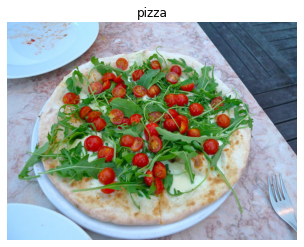

In [ ]:
# View a random image from the training set
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
set_cell_size()
img

array([[[ 42,  22,  13],
        [ 43,  23,  14],
        [ 47,  24,  16],
        ...,
        [ 15,   7,   5],
        [ 15,   7,   5],
        [ 15,   7,   5]],

       [[ 42,  22,  13],
        [ 45,  22,  14],
        [ 47,  24,  16],
        ...,
        [ 15,   7,   5],
        [ 15,   7,   5],
        [ 15,   7,   5]],

       [[ 46,  24,  13],
        [ 47,  25,  14],
        [ 48,  26,  15],
        ...,
        [ 14,   6,   4],
        [ 14,   6,   4],
        [ 14,   6,   4]],

       ...,

       [[ 88,  78,  77],
        [ 88,  78,  77],
        [ 88,  78,  77],
        ...,
        [178, 203, 208],
        [176, 201, 206],
        [175, 200, 205]],

       [[ 88,  78,  77],
        [ 88,  78,  77],
        [ 88,  78,  77],
        ...,
        [178, 203, 208],
        [176, 201, 206],
        [175, 200, 205]],

       [[ 87,  77,  76],
        [ 87,  77,  76],
        [ 87,  77,  76],
        ...,
        [178, 203, 208],
        [176, 201, 206],
        [175, 200, 205]]

In [ ]:
set_cell_size()

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 42,  22,  13],
        [ 43,  23,  14],
        [ 47,  24,  16],
        ...,
        [ 15,   7,   5],
        [ 15,   7,   5],
        [ 15,   7,   5]],

       [[ 42,  22,  13],
        [ 45,  22,  14],
        [ 47,  24,  16],
        ...,
        [ 15,   7,   5],
        [ 15,   7,   5],
        [ 15,   7,   5]],

       [[ 46,  24,  13],
        [ 47,  25,  14],
        [ 48,  26,  15],
        ...,
        [ 14,   6,   4],
        [ 14,   6,   4],
        [ 14,   6,   4]],

       ...,

       [[ 88,  78,  77],
        [ 88,  78,  77],
        [ 88,  78,  77],
        ...,
        [178, 203, 208],
        [176, 201, 206],
        [175, 200, 205]],

       [[ 88,  78,  77],
        [ 88,  78,  77],
        [ 88,  78,  77],
        ...,
        [178, 203, 208],
        [176, 201, 206],
        [175, 200, 205]],

       [[ 87,  77,  76],
        [ 87,  77,  76],
        [ 87,  77,  76],
        ...,
        [178, 203, 20

In [ ]:
# View the image shape
img.shape # returns width, height, color channels

(384, 512, 3)

**Steps in modelling w/ TensorFlow**  

1. Turn all data into numbers (NNs can't handle images)
2. Make sure all *Tensors* are the right shape
3. Scale Features (normalize or standaridize, NNs tend to prefer normalization)

>🔑 **Note:** NNs prefer the values they work with to be b/w $0$ and $1$.  
>
>Knowing this, one of the most common preprocessing steps for working w/ images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
set_cell_size()

# Get all the pixel values between 0 & 1
img/255.0

array([[[0.16470588, 0.08627451, 0.05098039],
        [0.16862745, 0.09019608, 0.05490196],
        [0.18431373, 0.09411765, 0.0627451 ],
        ...,
        [0.05882353, 0.02745098, 0.01960784],
        [0.05882353, 0.02745098, 0.01960784],
        [0.05882353, 0.02745098, 0.01960784]],

       [[0.16470588, 0.08627451, 0.05098039],
        [0.17647059, 0.08627451, 0.05490196],
        [0.18431373, 0.09411765, 0.0627451 ],
        ...,
        [0.05882353, 0.02745098, 0.01960784],
        [0.05882353, 0.02745098, 0.01960784],
        [0.05882353, 0.02745098, 0.01960784]],

       [[0.18039216, 0.09411765, 0.05098039],
        [0.18431373, 0.09803922, 0.05490196],
        [0.18823529, 0.10196078, 0.05882353],
        ...,
        [0.05490196, 0.02352941, 0.01568627],
        [0.05490196, 0.02352941, 0.01568627],
        [0.05490196, 0.02352941, 0.01568627]],

       ...,

       [[0.34509804, 0.30588235, 0.30196078],
        [0.34509804, 0.30588235, 0.30196078],
        [0.34509804, 0

## And end-to-end example  

Let's build a Convolutional Neural Network to find patterns in our images, more specifically, we need a way to: 

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel data b/w 0 & 1, also called scaling/normalization)

# Set up two instances of ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) # Generate batches of tensor image data with real-time data augmentation.
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
# Bring in instance of ImageDataGenerator
train_data = train_datagen.flow_from_directory(directory=train_dir, # Takes the path to a directory & generates batches of augmented data.
                                               batch_size=32,
                                               target_size=(224, 224), # reshape to 224 x 224 
                                               class_mode="binary",
                                               seed=42) 

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation=tf.keras.activations.relu,
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # exact same as above
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2), # exact same as above MaxPool
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=1, activation="sigmoid") # sigmoid -> Binary Classification
])  

# Compile our CNN
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])  

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # len(train_data) = 47 (1500/32 = 46.875)
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 226ms/step - loss: 0.5710 - accuracy: 0.6900 - val_loss: 0.3952 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4256 - accuracy: 0.8113 - val_loss: 0.3492 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4089 - accuracy: 0.8293 - val_loss: 0.3400 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3673 - accuracy: 0.8480 - val_loss: 0.3147 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3312 - accuracy: 0.8607 - val_loss: 0.2931 - val_accuracy: 0.8680


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to *Runtime* -> *Change Runtime Type* -> *Hardware Accelerator* -> *GPU* (you may have to rerun some cells above).

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 110s 2s/step - loss: 0.5785 - accuracy: 0.6780 - val_loss: 0.4020 - val_accuracy: 0.8360

# Usually the first epoch is around 50% slower than the subsequent epochs (load all data into memory)
# Changing runtime deleted all our files

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

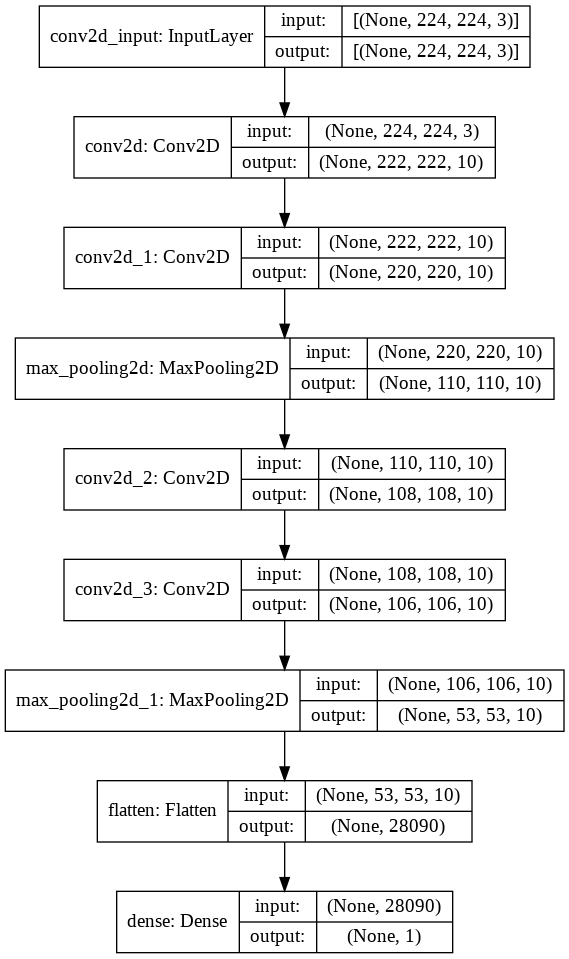

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

🔨 **Exercise:** Go through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/) for a minimum of 10-minutes and compare our NN with theirs.

Activation Functions can be added as a seperate layers in a model:

> `tf.keras.layers.Activation(tf.nn.relu)`  
                  or   
> `tf.keras.layers.Activation("relu")`

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.00845&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):

In [ ]:
train_data

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])  

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.8548 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.4773 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20 times parameters as our CNN model, it still performs terribly.

In [ ]:
# Improving non-CNN model

# Set random_seed
tf.random.set_seed(42)

# Create the model
model_3_prac = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(units=10, activation="relu"),
  tf.keras.layers.Dense(units=10, activation="relu"),
  tf.keras.layers.Dense(units=10, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile the model
model_3_prac.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit the model
history_3_prac = model_3_prac.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 10s 201ms/step - loss: 0.5844 - accuracy: 0.6880 - val_loss: 0.4958 - val_accuracy: 0.7480
Epoch 2/10
47/47 [==============================] - 9s 192ms/step - loss: 0.5045 - accuracy: 0.7653 - val_loss: 0.5139 - val_accuracy: 0.7400
Epoch 3/10
47/47 [==============================] - 9s 193ms/step - loss: 0.5192 - accuracy: 0.7427 - val_loss: 0.4583 - val_accuracy: 0.7680
Epoch 4/10
47/47 [==============================] - 9s 192ms/step - loss: 0.4429 - accuracy: 0.8047 - val_loss: 0.4551 - val_accuracy: 0.7780
Epoch 5/10
47/47 [==============================] - 9s 193ms/step - loss: 0.4427 - accuracy: 0.8053 - val_loss: 0.4822 - val_accuracy: 0.7580
Epoch 6/10
47/47 [==============================] - 9s 193ms/step - loss: 0.4034 - accuracy: 0.8273 - val_loss: 0.4308 - val_accuracy: 0.7900
Epoch 7/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3961 - accuracy: 0.8287 - val_loss: 0.4286 - val_accuracy: 0.8040
Epoch

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above, but stepped up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 3.1464 - accuracy: 0.6213 - val_loss: 0.8647 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 1.6245 - accuracy: 0.6747 - val_loss: 0.6687 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.9824 - accuracy: 0.6940 - val_loss: 0.6781 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.5458 - accuracy: 0.7660 - val_loss: 0.5375 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5635 - accuracy: 0.7733 - val_loss: 0.4394 - val_accuracy: 0.7800


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


`model_3` has $5$ X no. of parameters of CNN model, but does not perform anywhere near as well.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, SCALING/NORMALIZING & *turning our data into batches*)
3. Created a model (start w/ a baseline (food101 paper))
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2823872.jpg']
Image shape: (512, 512, 3)
['816577.jpg']
Image shape: (512, 384, 3)


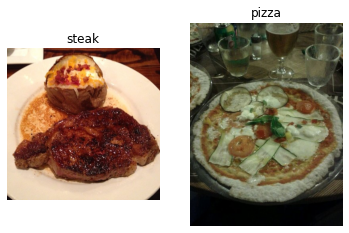

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**. (*batch* -> a small subset of data our model looks at while  training).  

Reasons: 

1. ~10,000 images (or more) might not fit into the memory of our processor (GPU)  
2. Trying to learn the patterns in ~10,000 images in one hit could result in the model not being able to learn very well.

*Why 32?* 

Because 32 is good for your health. (YannLeCun)  

In [ ]:
!nvidia-smi

Wed Sep  1 05:06:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    25W /  75W |   1935MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)  

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224, 224),  # Target size of images (height x width) 
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32)  # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
set_cell_size(height=400)

# Get the first two images
images[:2], images[0].shape

(array([[[[0.4039216 , 0.35686275, 0.35686275],
          [0.38823533, 0.34901962, 0.3529412 ],
          [0.37647063, 0.34117648, 0.36078432],
          ...,
          [0.43529415, 0.29803923, 0.28235295],
          [0.40784317, 0.3019608 , 0.27450982],
          [0.3803922 , 0.3019608 , 0.26666668]],
 
         [[0.44705886, 0.3372549 , 0.2901961 ],
          [0.48627454, 0.3803922 , 0.34509805],
          [0.43529415, 0.3529412 , 0.33333334],
          ...,
          [0.60784316, 0.46274513, 0.427451  ],
          [0.60784316, 0.43921572, 0.4156863 ],
          [0.60784316, 0.41960788, 0.41176474]],
 
         [[0.40000004, 0.2392157 , 0.15294118],
          [0.6313726 , 0.48627454, 0.41176474],
          [0.6039216 , 0.47450984, 0.4156863 ],
          ...,
          [0.70980394, 0.5019608 , 0.4784314 ],
          [0.69803923, 0.4784314 , 0.47450984],
          [0.68235296, 0.46274513, 0.4666667 ]],
 
         ...,
 
         [[0.3254902 , 0.23529413, 0.17254902],
          [0.30588

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginnning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.  

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works with your data and then introduce complexity as required. (e.g Look at which current model is performing best in your field for your problem).

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

* `filters` - Number of sliding windows going across an input (higher = more complex model)  
* `kernel_size` - Size of sliding window going across an input.  
* `strides` - Size of the step the sliding window takes across an input.
* `padding` - `same`: output_shape is same as input_shape (Default: `valid`)

In [ ]:
# Create the model (this will be our baseline, a 3 layer CNN)

model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1, # if image is informationally dense, 
         padding="valid", # if "same", output_shape is same as input_shape, if "valid" output_shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input_shape)
  Conv2D(filters=10,
         kernel_size=3,
         strides=1, # default = 1 (need not be defined)
         padding="valid", # default = "valid"
         activation="relu"),
  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  Flatten(),
  Dense(units=1, activation="sigmoid") # output layer (binary classification, so only 1 output neuron)
])  

🔨 **Practice:** Understand what's going on in a Conv2D layer by going through the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-20 minutes.

In [ ]:
# Compile the model
model_4.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model to see how the input shape changes throughout
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Image data slowly loses edges. `padding = valid`

### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
from keras.callbacks import TensorBoard

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        # callbacks=[tensorboard_callback]
                        )

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.9984 - accuracy: 0.7100 - val_loss: 0.3937 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4029 - accuracy: 0.8253 - val_loss: 0.3863 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.2776 - accuracy: 0.8887 - val_loss: 0.3494 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.1281 - accuracy: 0.9613 - val_loss: 0.4099 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.0564 - accuracy: 0.9893 - val_loss: 0.6621 - val_accuracy: 0.7760


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 144ms/step - loss: 0.2931 - accuracy: 0.8680


[0.2930607795715332, 0.8679999709129333]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

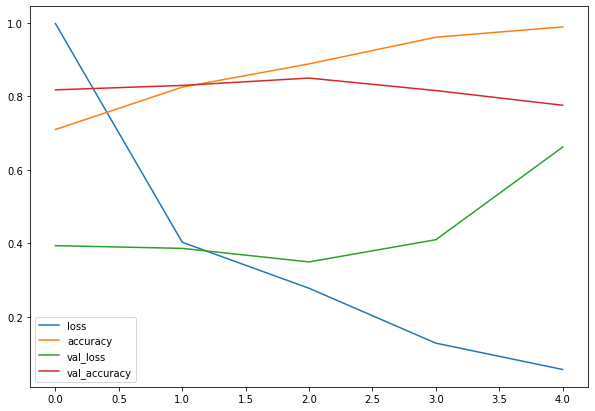

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  '''
  Returns seperate loss curves for training and validation metrics.
  '''
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() # everytime we want a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

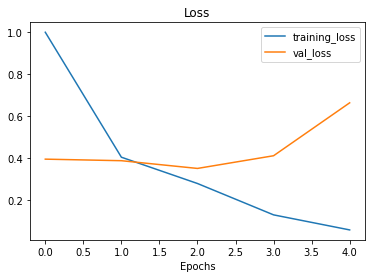

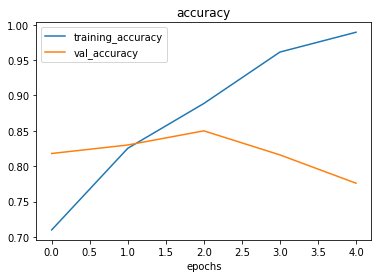

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4);

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.  

This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished. 

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Random
* Increase the num of `Conv` layers (make model deeper)
* Increase the number of `Conv` filters
* Add another `Dense` layer to the output of our *flattened* layer
* etc..(but the main ones above 👆)  

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...  

> 🔑 **Note:** Reducing overfitting is also knowns as **regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=(1, 1),
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(), # default = (2, 2) or 2

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid")
])

`MaxPool2D` - finds the most important features.

In [ ]:
# Compile the model
model_5.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6110 - accuracy: 0.6693 - val_loss: 0.4476 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4631 - accuracy: 0.7900 - val_loss: 0.3690 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4371 - accuracy: 0.8107 - val_loss: 0.3644 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4201 - accuracy: 0.8153 - val_loss: 0.3372 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3895 - accuracy: 0.8267 - val_loss: 0.3378 - val_accuracy: 0.8780


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


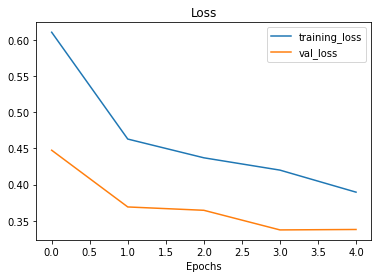

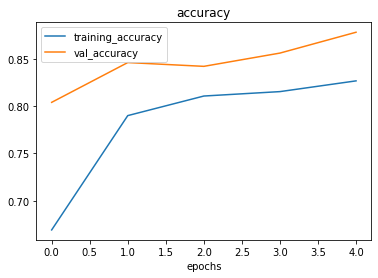

In [ ]:
# Plot loss curves 
plot_loss_curves(history_5)

 ### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator `training` instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much do you want to rotate an image?
                                             shear_range=0.2, # How much do you want to shear an image?
                                             zoom_range=0.2, # Zoom in randomly on an image
                                             width_shift_range=0.2, # Move your image around on the x-axis
                                             height_shift_range=0.2, # Move your image around on the y-axis
                                             horizontal_flip=True) # Do you want to flip an image ?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator `testing` instance w/o data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> ❓ **Question:** What is data augmentation?

Data Augmentation is the process of altering our traning data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.  

Altering might mean adjusting the rotation og an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation

In [ ]:
# Import data and augment it from Training Directory
print("Augmented Training Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # `False` -> for demonstration purposes only
# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary") #shuffle = True (we do not need to visualize)
                                             

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data Augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.  

Finally...Let's visualize some augmented data!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: Labels aren't augmented...Only data (images)

Showing image number: 4


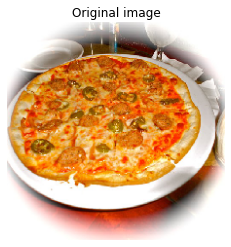

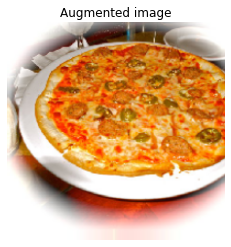

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

There are more different kinds of data augmentation such as cropping, replacing, shearing.

In [ ]:
# Builing a model on augmented data

# Standard imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Set random seed
tf.random.set_seed(42) 

# 1. Create a model

model_6 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid")
])

# 2. Compile the model
model_6.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

'''
A **Callback** works during model training.
It has to exist back model training.
'''

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# 4. Fit the model (passing the learning rate scheduler)
history_6 = model_6.fit(train_data_augmented, # Fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/5
47/47 [==============================] - 25s 513ms/step - loss: 0.6975 - accuracy: 0.4800 - val_loss: 0.6843 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 24s 506ms/step - loss: 0.6899 - accuracy: 0.5487 - val_loss: 0.6779 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6850 - accuracy: 0.5680 - val_loss: 0.6676 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6821 - accuracy: 0.5713 - val_loss: 0.6555 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6726 - accuracy: 0.6020 - val_loss: 0.6415 - val_accuracy: 0.6900


The reason why training (epochs) take longer with augmented data, is because the `train_dir` remains unchanged, the augmentation happens on the fly as it is being loaded in.

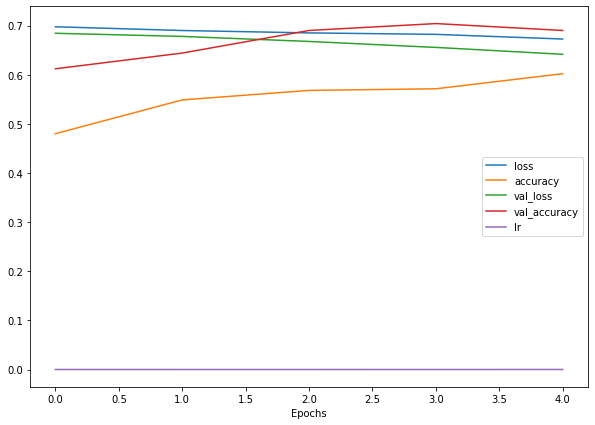

In [ ]:
pd.DataFrame(history_6.history).plot(figsize=(10, 7), xlabel="Epochs");

In [ ]:
# Plot the `learning_rate` vs `loss` while training
lrs = 1e-4*10**(tf.range(5)/1)
lrs

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])>

In [ ]:
len(lrs)

5

Text(0.5, 1.0, 'Learning Rate vs. Loss')

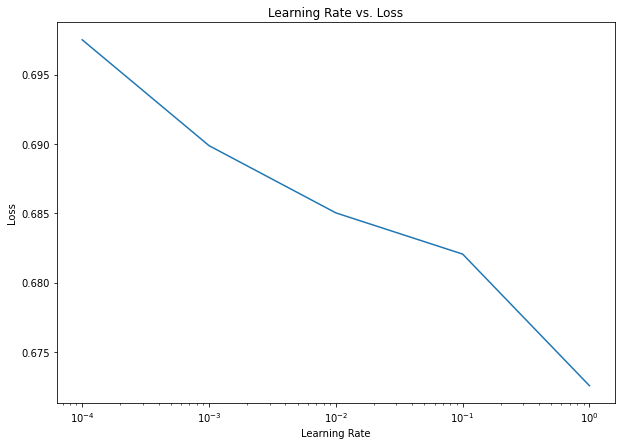

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

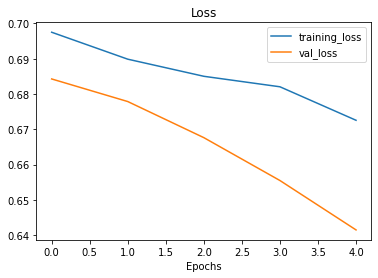

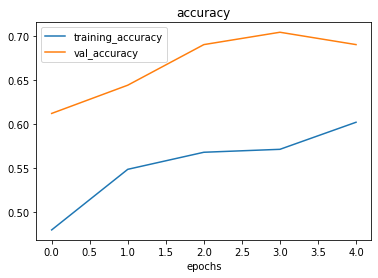

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our *augmented training data* and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"])

# # Create learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/1))

# 3. Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        # callbacks=[lr_scheduler],
                        validation_data=test_data,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6328 - accuracy: 0.6193 - val_loss: 0.4970 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 24s 503ms/step - loss: 0.5802 - accuracy: 0.6947 - val_loss: 0.4572 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5196 - accuracy: 0.7507 - val_loss: 0.3857 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4738 - accuracy: 0.7773 - val_loss: 0.3248 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.4676 - accuracy: 0.7827 - val_loss: 0.3191 - val_accuracy: 0.8700


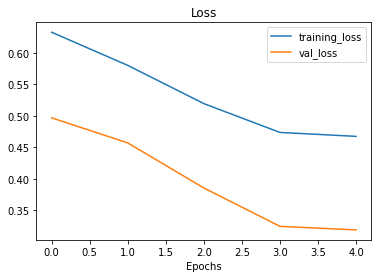

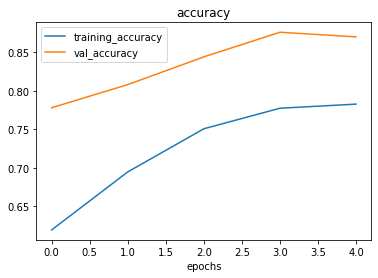

In [ ]:
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each Convolutional Layer (e.g *10* -> *32* or even *64*)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer Learning** to leverage what another image model has learned and adjust it for our own use case.  

> 🔨 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [ ]:
# Recreating CNN explainer website model with augmented data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
prac_model_1 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(pool_size=2),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid") # binary crossentropy
])

# 2. Compile the model
prac_model_1.compile(optimizer=Adam(),
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

# 3. Fit the model
prac_history_1 = prac_model_1.fit(train_data_augmented_shuffled,
                                  epochs=5,
                                  validation_data=test_data,
                                  steps_per_epoch=len(train_data_augmented_shuffled),
                                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6174 - accuracy: 0.6513 - val_loss: 0.4253 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 25s 522ms/step - loss: 0.4892 - accuracy: 0.7713 - val_loss: 0.4311 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 25s 523ms/step - loss: 0.4728 - accuracy: 0.7793 - val_loss: 0.3487 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4748 - accuracy: 0.7753 - val_loss: 0.3461 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 24s 518ms/step - loss: 0.4668 - accuracy: 0.7840 - val_loss: 0.2978 - val_accuracy: 0.8740


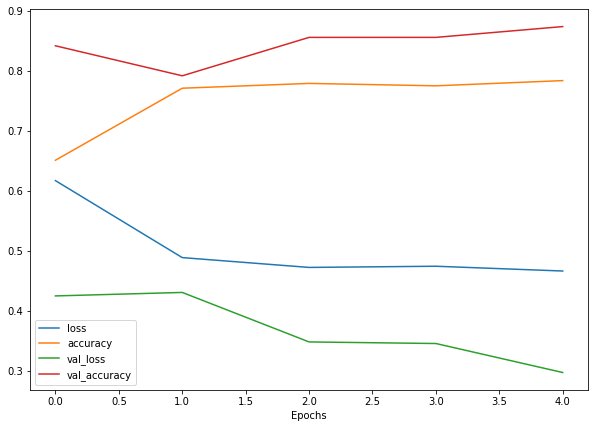

In [ ]:
pd.DataFrame(prac_history_1.history).plot(figsize=(10, 7), xlabel="Epochs")

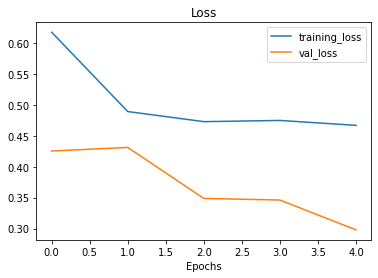

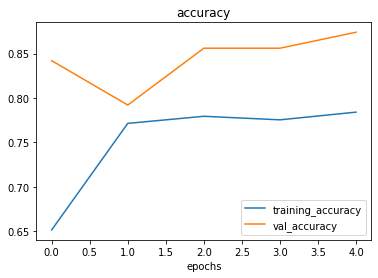

In [ ]:
plot_loss_curves(prac_history_1)

In [ ]:
# Recreating the CNN explainer website model with augmented + shuffled data AND 32 filters instead of 10

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
prac_model_2 = Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(pool_size=2),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid") # Binary Classification
])

# 2. Compile the model
prac_model_2.compile(optimizer=Adam(),
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

# 3. Fit the model
prac_history_2 = prac_model_2.fit(train_data_augmented_shuffled,
                                  epochs=5,
                                  validation_data=test_data,
                                  steps_per_epoch=len(train_data_augmented_shuffled),
                                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 566ms/step - loss: 0.6324 - accuracy: 0.6327 - val_loss: 0.4218 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5144 - accuracy: 0.7447 - val_loss: 0.4471 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4887 - accuracy: 0.7727 - val_loss: 0.3509 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4962 - accuracy: 0.7680 - val_loss: 0.3424 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4552 - accuracy: 0.7947 - val_loss: 0.3303 - val_accuracy: 0.8600


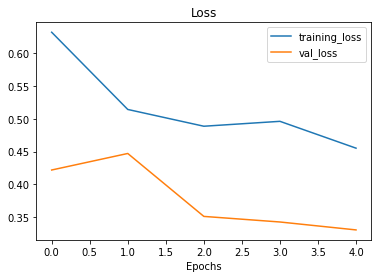

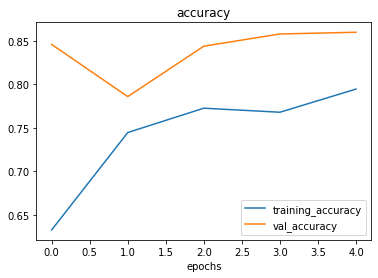

In [ ]:
plot_loss_curves(prac_history_2)

In [ ]:
# Using the above model to find the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
prac_model_2_callback = Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         activation="relu",
         input_shape=(224, 224, 3)),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(pool_size=2),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid") # Binary Classification
])

# 2. Compile the model
prac_model_2_callback.compile(optimizer=Adam(),
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

# 3. Creating Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/1))

# 4. Fit the model
prac_history_2_callback = prac_model_2_callback.fit(train_data_augmented_shuffled,
                                                    epochs=5,
                                                    callbacks=[lr_scheduler],
                                                    validation_data=test_data,
                                                    steps_per_epoch=len(train_data_augmented_shuffled),
                                                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6649 - accuracy: 0.5780 - val_loss: 0.6220 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5781 - accuracy: 0.7200 - val_loss: 0.4050 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 26s 544ms/step - loss: 0.9140 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6942 - accuracy: 0.4867 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.7039 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
lrs = 1e-4*10**(tf.range(5)/1)
lrs

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])>

Text(0.5, 1.0, 'Learning Rate vs Loss')

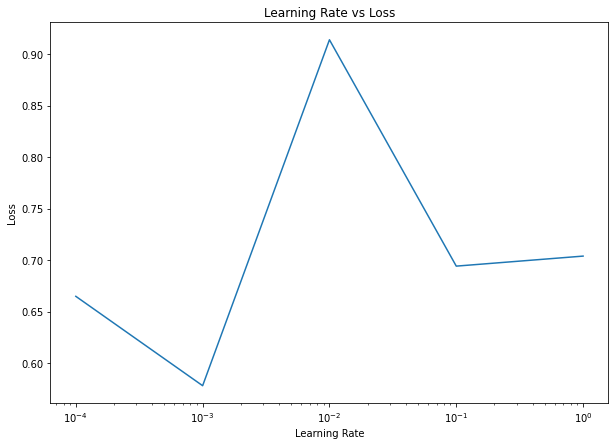

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, prac_history_2_callback.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
(10**-3)/10

0.0001

In [ ]:
# Recreating the above model with optimal Learning Rate

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
prac_model_3 = Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(pool_size=2),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),

  Conv2D(filters=32,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=1, activation="sigmoid") # Binary Classification
])

# 2. Compile the model (w/ lr = 0.0001)
prac_model_3.compile(optimizer=Adam(learning_rate=0.0001),
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

# 3. Fit the model
prac_history_3 = prac_model_3.fit(train_data_augmented_shuffled,
                                  epochs=5,
                                  validation_data=test_data,
                                  steps_per_epoch=len(train_data_augmented_shuffled),
                                  validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 551ms/step - loss: 0.6627 - accuracy: 0.5940 - val_loss: 0.5790 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5845 - accuracy: 0.6933 - val_loss: 0.4694 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 26s 547ms/step - loss: 0.5039 - accuracy: 0.7540 - val_loss: 0.4570 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4663 - accuracy: 0.7860 - val_loss: 0.3500 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 26s 544ms/step - loss: 0.4631 - accuracy: 0.7907 - val_loss: 0.3664 - val_accuracy: 0.8480


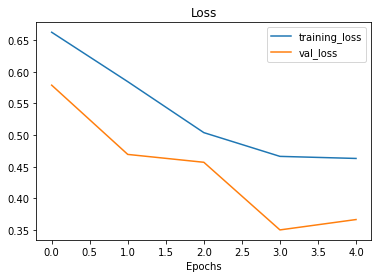

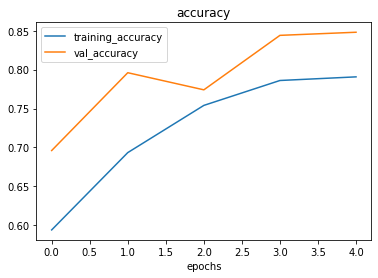

In [ ]:
plot_loss_curves(prac_history_3)

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-09-01 05:22:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2021-09-01 05:22:58 (23.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



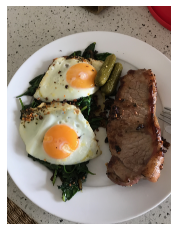

In [ ]:
# View our example image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

>🔑 **Note:** When you train a NN and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your mdoel was trained on. 

In [ ]:
# Create a function to import a image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  '''
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  '''
  # Read in the image
  img = tf.io.read_file(filename) # Reads the contents of the filename and returns a tensor of dtype "string", with the file contents.

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255
  
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
set_cell_size()
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
pred = model_7.predict(expanded_steak)
pred

array([[0.8328304]], dtype=float32)

Image Tensor Shape:

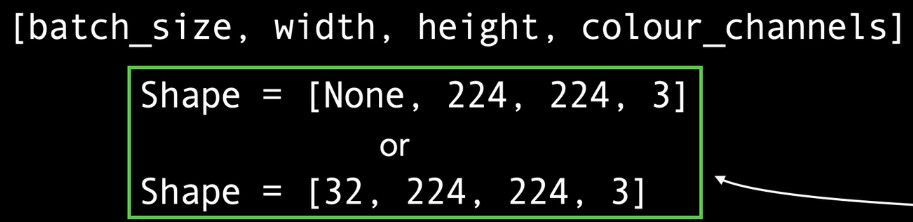

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


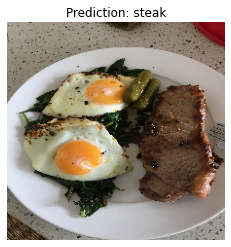

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, filename="03-steak.jpeg")

Our model works! Let's try it on another image...this time pizza 🍕

--2021-09-01 05:23:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-09-01 05:23:02 (39.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



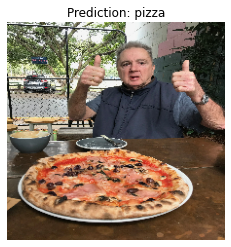

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, filename="03-pizza-dad.jpeg")

## Multi-Class Image Classification

We've just been through a bunch of the following steps with a binary classification (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-01 05:23:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   218MB/s    in 2.3s    

2021-09-01 05:23:05 (218 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walkthrough 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1254768.jpg']
Image shape: (512, 384, 3)


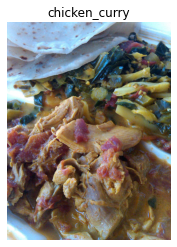

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)

'chicken_wings'

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website...How about we just take their model (also on 10 classes) and use it for our problem?





In [ ]:
# Standard imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

# Set random seed
tf.random.set_seed(42)

# 1. Create our model (CNN explainer website)
model_8 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224, 224, 3)),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(pool_size=2),

  Conv2D(filters=10,
         kernel_size=3),
  Activation("relu"),

  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=10, activation="softmax") # Multi-Class Classification
])

# 2. Compile the model
model_8.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        validation_data = test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 2.1574 - accuracy: 0.1932 - val_loss: 2.0465 - val_accuracy: 0.2476
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.9852 - accuracy: 0.2929 - val_loss: 1.9581 - val_accuracy: 0.2924
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 1.7294 - accuracy: 0.4040 - val_loss: 2.0155 - val_accuracy: 0.2968
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 1.2057 - accuracy: 0.5949 - val_loss: 2.2697 - val_accuracy: 0.2676
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.5491 - accuracy: 0.8236 - val_loss: 3.2228 - val_accuracy: 0.2592


In [ ]:
len(train_data)

235

### 5. Evaluate the model



In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 3.2228 - accuracy: 0.2592


[3.222759485244751, 0.25920000672340393]

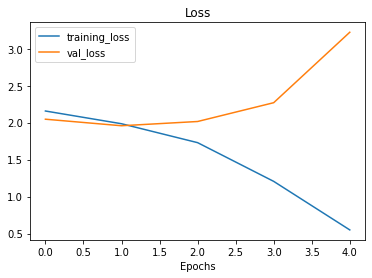

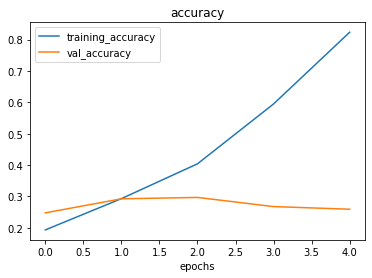

In [ ]:
# Check out the model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

Well...it seems our model is **overfitting** the training set quite badly...in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)  

Due to it's performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).  

So, let's try and fix overfitting by...  

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - If our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to :
  * Reduce # of layers  
    *OR*
  * Hidden units in layers
  * **Use Data Augmentation** - Data Augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
  * **Use Transfer Learning** - Transfer Learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# How about we try and simplify the model first?
# Let's try to remove 2 Conv Layers

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         activation="relu",
         input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  
  Conv2D(filters=10,
         kernel_size=3,
         activation="relu"),
  MaxPool2D(),

  Flatten(),
  Dense(units=10, activation="softmax") # Multiclass Classification
])

# 2. Compile the model
model_9.compile(optimizer=Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Fit the model with 2x Conv layers removes
history_9 = model_9.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1153 - accuracy: 0.2448 - val_loss: 2.0301 - val_accuracy: 0.2968
Epoch 2/5
235/235 [==============================] - 46s 196ms/step - loss: 1.8089 - accuracy: 0.3813 - val_loss: 1.9106 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.4530 - accuracy: 0.5169 - val_loss: 1.8334 - val_accuracy: 0.3748
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 0.9675 - accuracy: 0.7007 - val_loss: 2.0910 - val_accuracy: 0.3376
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.5394 - accuracy: 0.8491 - val_loss: 2.5737 - val_accuracy: 0.3072


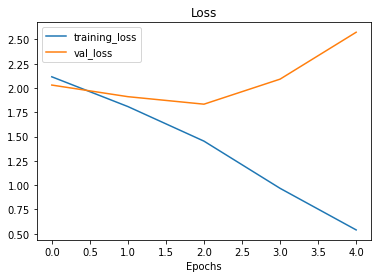

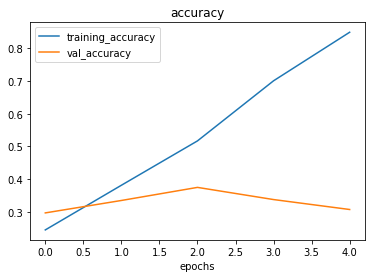

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [ ]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
activation (Activation)      (None, 108, 108, 10)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 10)      

Looks like our "simplifying the model" experiment didn't work, the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation  

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:  
  * Reduce Overfitting (get the train and validation loss curves closer)
  * Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical",
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training dat of 10 classes

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (CLONE existing model)
model_10 = tf.keras.models.clone_model(model_8) # Same as TinyVGG Arch (restarts weights)

# 2. Compile the model
model_10.compile(optimizer=Adam(),
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

In [ ]:
# 3. Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 518ms/step - loss: 2.2006 - accuracy: 0.1875 - val_loss: 2.0534 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 121s 515ms/step - loss: 2.0810 - accuracy: 0.2475 - val_loss: 1.9535 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 121s 514ms/step - loss: 2.0252 - accuracy: 0.2888 - val_loss: 1.9037 - val_accuracy: 0.3204
Epoch 4/5
235/235 [==============================] - 121s 514ms/step - loss: 1.9869 - accuracy: 0.3033 - val_loss: 1.7996 - val_accuracy: 0.3844
Epoch 5/5
235/235 [==============================] - 121s 514ms/step - loss: 1.9520 - accuracy: 0.3223 - val_loss: 1.7989 - val_accuracy: 0.3868


`val_accuracy` has improved a little bit.

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 3.2228 - accuracy: 0.2592


[3.222759962081909, 0.25920000672340393]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 146ms/step - loss: 1.7989 - accuracy: 0.3868


[1.7988630533218384, 0.38679999113082886]

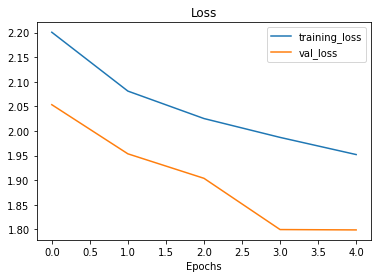

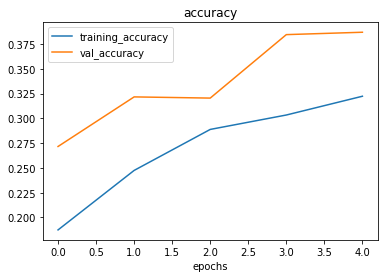

In [ ]:
# Loss curves for model trained on augmented data
plot_loss_curves(history_10)

Woah! That looks much better.  

The loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (down).  

So if we were to train for longer, we might see further improvement.

### 7. Repeat until satisfied  

We could keep going here...continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.  

How?  

By running lots of experiments, namely:  
- Restructuring our model's architecture  
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)  
- Training for longer (e.g 10 epochs instead of 5 epochs)

### Making a prediction with our trained model  

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/allenthemartian/TDC/main/test_pizza.jpg?token=APPHJG7OAWEMHD6RD2IHP7TBF4TGQ

--2021-09-01 07:05:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-09-01 07:05:54 (42.1 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2021-09-01 07:05:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  '''
  Imports an image located at filename, makes a prediction with model
  and plot the image with the predicted class as the title.
  '''
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  # Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

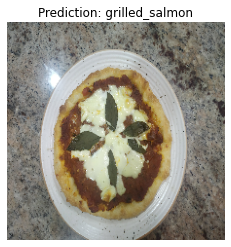

In [ ]:
# Make a prediction using model_10
pred_and_plot(model_10,
              filename="test_pizza.jpg?token=APPHJG7OAWEMHD6RD2IHP7TBF4TGQ",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~25% accuracy on the test data.  

So we can expect it to function quite poorly on other unseen data.

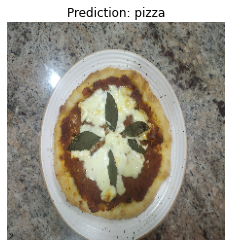

In [ ]:
# Good news: Our updated pred_and_plot function works for binary classification too:
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="test_pizza.jpg?token=APPHJG7OAWEMHD6RD2IHP7TBF4TGQ",
              class_names=["pizza", "steak"])

## Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 1.7989 - accuracy: 0.3868


[1.7988626956939697, 0.38679999113082886]

In [ ]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 1.7989 - accuracy: 0.3868


[1.7988630533218384, 0.38679999113082886]